In [39]:
# Librerias requeridas
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [24]:
# Importamos los datos preprocesados
df_final = joblib.load('Salidas\\df_final.pkl')
pd.options.display.max_columns = None

In [25]:
df_final

MES_x Tipo  NRODOC  Peso  Talla ClasificaciÃ³n IMC   
0      OCTUBRE   CC  308418  62.0  155.0          Sobrepeso  \
1      OCTUBRE   CC  308418  62.0  155.0          Sobrepeso   
2      OCTUBRE   CC  308418  62.0  155.0          Sobrepeso   
3      OCTUBRE   CC  308418  62.0  155.0          Sobrepeso   
4      OCTUBRE   CC  308418  62.0  155.0          Sobrepeso   
...        ...  ...     ...   ...    ...                ...   
30333    MARZO   CC  308066  68.0  166.0             Normal   
30334    MARZO   CC  308066  68.0  166.0             Normal   
30335    MARZO   CC  308066  68.0  166.0             Normal   
30336    MARZO   CC  308066  68.0  166.0             Normal   
30337    MARZO   CC  308066  68.0  166.0             Normal   

       SaturaciÃ³n de OxÃ­geno (%)  PerÃ­metro Muslo  PerÃ­metro Cintura   
0                             94.0                60                89.0  \
1                             94.0                60                89.0   
2                             94.0                60                89.0   
3                             94.0                60                89.0   
4                             94.0                60                89.0   
...                            ...               ...                 ...   
30333                         96.0                50                89.0   
30334                         96.0                50                89.0   
30335                         96.0                50                89.0   
30336                         96.0                50                89.0   
30337                         96.0                50                89.0   

       Pliegue Triceps  Pliegue Abdomen  Pliegue Muslo  Sumatoria Pliegues   
0                 25.0             35.0           20.0                80.0  \
1                 25.0             35.0           20.0                80.0   
2                 25.0             35.0           20.0                80.0   
3                 25.0             35.0           20.0                80.0   
4                 25.0             35.0           20.0                80.0   
...                ...              ...            ...                 ...   
30333             20.0             20.0           15.0                55.0   
30334             20.0             20.0           15.0                55.0   
30335             20.0             20.0           15.0                55.0   
30336             20.0             20.0           15.0                55.0   
30337             20.0             20.0           15.0                55.0   

       PresiÃ³n Arterial SistÃ³lica  PresiÃ³n Arterial DiastÃ³lica   
0                               181                            143  \
1                               181                            143   
2                               181                            143   
3                               181                            143   
4                               181                            143   
...                             ...                            ...   
30333                           154                             98   
30334                           154                             98   
30335                           154                             98   
30336                           154                             98   
30337                           154                             98   

       Frecuencia CardÃ­aca en reposo  Auto-calificacion Nivel de Ejercicio   
0                                  90                                     2  \
1                                  90                                     2   
2                                  90                                     2   
3                                  90                                     2   
4                                  90                                     2   
...                               ...                                   ...   
30333   

In [26]:
# Clasificación por peso de los usuarios
attrition_counts = df_final['ClasificaciÃ³n IMC'].value_counts()

# Crear el gráfico de torta
fig = px.pie(values = attrition_counts, names = attrition_counts.index, title = 'Clasificación por IMC')
fig.show()


In [27]:
# Distribución de la fragilidad
fig = px.histogram(df_final, x = 'Ãndice de Fragilidad Groningen', title = 'Histograma del índice de fragilidad Groningen')
fig.show()

In [28]:
fig = px.box(df_final, y='Hormona Estimulante de la Tiroides (TSH)', title="Diagrama de Caja de TSH",
             labels={'Hormona Estimulante de la Tiroides (TSH)': 'Valor de TSH'})

# Mostrar el diagrama de caja
fig.show()

No muestra una distribucion normal, mostrando muchos datos atipicos lo que nos suguiere una imputacion de datos
especificamente los datos extremos, para no afectar el modelo. 

In [29]:
sexo_counts = df_final['SEXO'].value_counts()

# Create a new DataFrame with counts and SEXO values
df_sexo_counts = pd.DataFrame({'SEXO': sexo_counts.index, 'Count': sexo_counts.values})

# Plot the bar chart using plotly express
fig = px.bar(df_sexo_counts, x='SEXO', y='Count', labels={'x': 'SEXO', 'y': 'Cantidad de observaciones'}, title="Distribución de Sexo")

# Show the bar chart
fig.show()

Las mujeres son mas propensas a enfermarse. 

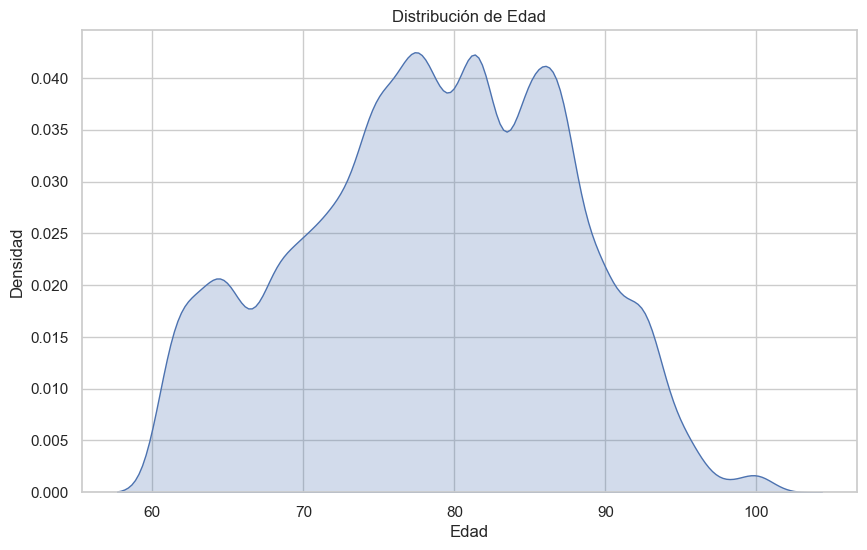

In [30]:
# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_final, x='EDAD_2', fill=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

In [33]:
# Distribución del apoyo mono podal
fig = px.histogram(df_final, x = 'Tiempo en Segundos (Recorrer 5 metros)', title = 'Histograma del apoyo mono podal')
fig.show()

In [34]:
# Clasificación por velocidades
fig = px.histogram(df_final, x = 'CalificaciÃ³n Velocidad', title = 'Clasificación por velocidades', color="CalificaciÃ³n Velocidad")
fig.show()

In [35]:
# Clasificación por clase funcional
attrition_counts = df_final['Clase Funcional'].value_counts()

fig = px.pie(values = attrition_counts, names = attrition_counts.index, title = 'Clasificación por clase funcional')
fig.show()

In [36]:
# Clasificación por diagnostico
attrition_counts = df_final['Diagnostico'].value_counts()

fig = px.pie(values = attrition_counts, names = attrition_counts.index, title = 'Clasificación por diagnóstico')
fig.show()

In [37]:
# Para renombrar los valores dentro de las variables
df_final.replace({'CLASE FUNCIONAL 1': 'Clase Funcional 1',
                  'clase funcional 1': 'Clase Funcional 1',
                  'Clase funcional 1': 'Clase Funcional 1',
                  'CLASE FUNCIONAL 2A': 'Clase Funcional 2A',
                  'clase funcional 2a': 'Clase Funcional 2A',
                  'Clase funcional 2A': 'Clase Funcional 2A',
                  'CLASE FUNCIONAL 2B': 'Clase Funcional 2B',
                  'clase funcional 2b': 'Clase Funcional 2B',
                  'Clase funcional 2B': 'Clase Funcional 2B',
                  'CLASE FUNCIONAL 3': 'Clase Funcional 3',
                  'clase funcional 3': 'Clase Funcional 3',
                  'Clase funcional 3': 'Clase Funcional 3',
                  'CLASE FUNCIONAL 4': 'Clase Funcional 4',
                  'clase funcional 4': 'Clase Funcional 4',
                  'Clase funcional 4': 'Clase Funcional 4'}, inplace= True)

In [40]:
# Histograma para la cantidad de usuarios por primera y última clase funcional
fig = make_subplots(rows = 1, cols = 2)

fig.add_trace(
    go.Histogram(x = df_final['PRIMERA CLASE FUNCIONAL'], name = 'Primera clase funcional', marker_color = 'cadetblue'),
    row = 1, col = 1
)

fig.add_trace(
    go.Histogram(y = df_final['ÚLTIMA CLASE FUNCIONAL'], name = 'Última clase funcional', marker_color = 'firebrick'),
    row = 1, col = 2
)

fig.update_layout(
    title_text = "Clases en etapa inicial y final de los usuarios",
    template = 'simple_white')
fig.show()


In [42]:
# Analizar la razón de egresos 

base = df_final.groupby(['TIPO EGRESO'])['NRODOC'].count().reset_index().sort_values('NRODOC', ascending = False).rename(columns ={'NRODOC':'count'})
base['TIPO EGRESO'] = base['TIPO EGRESO'].astype('string')

cant_ed = df_final['TIPO EGRESO'].count()

fig = px.pie(base , values = 'count', names = 'TIPO EGRESO', title = 'Tipo de egreso',
             hole = .5)

fig.update_layout(
    legend_title = 'Razón del egreso',
    title_x = 0.5)

fig.show()
     

In [43]:
# Análisis de clasificación de pacientes con EPOC
fig = px.histogram(df_final, x='Tiene EPOC', title = 'Clasificación de pacientes según padecimiento de EPOC')
fig.show()

In [44]:
# Relación entre la clase funcional y la edad 

fig = px.box(df_final, x='Clase Funcional', y='EDAD_2')

# Personalizar (opcional)
fig.show()

In [45]:
fig = px.box(df_final, x='SEXO', y='DEMORA APLICACION MEDICAMENTO')
fig.show()

# Hay que preprocesar 

In [46]:
fig = px.histogram(df_final, x='VIA INGRESO', title = 'Vías de ingreso')
fig.show()
